In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [126]:
df=pd.read_csv("bank-full.csv",delimiter=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [127]:
df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [128]:
df["job"]=df["job"].map({"admin.":1,"unknown":2,"unemployed":3,"management":4,"housemaid":5,"entrepreneur":6,"student":7,
                                       "blue-collar":8,"self-employed":9,"retired":10,"technician":11,"services":12})

In [129]:
df["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [130]:
df["marital"]=df["marital"].map({"married":1,"divorced":2,"single":3})

In [131]:
df["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [132]:
df["education"]=df["education"].map({"unknown":1,"secondary":2,"primary":3,"tertiary":4})

In [133]:
df["default"]=df["default"].map({"yes":1,"no":0})

In [134]:
df["housing"]=df["housing"].map({"yes":1,"no":0})

In [135]:
df["loan"]=df["loan"].map({"yes":1,"no":0})

In [136]:
df["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [137]:
df["contact"]=df["contact"].map({"cellular":1,"unknown":2,"telephone":3})

In [138]:
df["month"]=df["month"].map({"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12})

In [139]:
df["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [140]:
df["poutcome"]=df["poutcome"].map({"unknown":1,"failure":2,"other":3,"success":4})

In [141]:
df["y"]=df["y"].map({"yes":1,"no":0})

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [143]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,4,0,2143,1,0,2,5,5,261,1,-1,0,1,0
1,44,11,3,2,0,29,1,0,2,5,5,151,1,-1,0,1,0
2,33,6,1,2,0,2,1,1,2,5,5,76,1,-1,0,1,0
3,47,8,1,1,0,1506,1,0,2,5,5,92,1,-1,0,1,0
4,33,2,3,1,0,1,0,0,2,5,5,198,1,-1,0,1,0


In [144]:
df.shape

(45211, 17)

In [145]:
x=df.iloc[:,:16]
y=df.iloc[:,16:]

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)

In [147]:
model = LogisticRegression()

In [148]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [149]:
y_test_pred=model.predict(x_test)

In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_pred)

array([[11739,   237],
       [ 1297,   291]], dtype=int64)

In [118]:
from sklearn.metrics import accuracy_score as ac
ac(y_test,y_test_pred)

0.8869065172515482

In [119]:
model.coef_

array([[-1.79633594e-02, -4.50976800e-02, -1.19498103e-01,
        -1.32960441e-01, -6.38844394e-03,  4.42948576e-05,
        -2.32516423e-01, -5.92019790e-02, -1.98188792e-01,
        -1.32969525e-02, -1.05971043e-01,  3.48977344e-03,
        -2.98623997e-01, -3.81540043e-05,  1.29508931e-01,
         1.90161439e-01]])

In [120]:
model.intercept_

array([-0.07962896])

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11927
           1       0.58      0.18      0.27      1637

    accuracy                           0.89     13564
   macro avg       0.74      0.58      0.61     13564
weighted avg       0.86      0.89      0.86     13564



0.8176078679406832

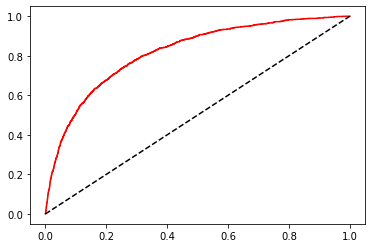

In [31]:
y_score=model.predict_proba(x_test)[:,1]
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,thresholds=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,color="red")
plt.plot([0,1],[0,1],"k--")
roc_auc_score(y_test,y_score)